In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
from IPython.display import (
    Markdown as md,
    Latex,
    HTML,
)
from tqdm.auto import tqdm

Cursory Analysis:
We'll start out by loading up the Twitter Sentiment Data and doing a bit of exploration to get a feel for what's going on with the data.

In [3]:
tweets = pd.read_csv("twitter_sentiment_data.csv")

In [4]:
display(tweets.shape)

(43943, 3)

`pd.DataFrame.shape` returns a tuple of (# rows, # columns, ...). This tells us that we have ~44K Tweets (or rows) and each Tweet has 3 features (or columns).

In [5]:
value_counts = tweets["sentiment"].value_counts()
value_counts.name = "Raw Number"

value_normd = tweets["sentiment"].value_counts(normalize=True)
value_normd.name = "Percentage"

display(pd.concat([value_counts, value_normd], axis=1))

,Raw Number,Percentage
1,22962,0.522541
2,9276,0.211092
0,7715,0.175568
-1,3990,0.090799


`pd.DataFrame["column"].value_counts` returns an enumeration over all the unique values and how many times that value appears in the `pd.DataFrame`.

In [6]:
display(tweets.head())

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


`pd.DataFrame.head` gives us the first 5 (by default) rows of the `tweets` DataFrame. This gives us a preview of the kinds of data we have in `tweets`.

EDA (Exploratory Data Analysis):
**Before we pick up on our analysis, let's make a copy of the `pd.DataFrame` so we can feed `tweets` into our models later.**
We're going to start an Exploratory Data Analysis **(EDA)**. The first step of any Machine Learning project is to develop an understanding of your data, as that will help with model selection later on.

In [7]:
from copy import deepcopy
eda = deepcopy(tweets)
# tqdm.pandas()

First up, I have a strong aversion to keeping track of numeric keys. So let's replace all numeric values with the appropriate **labels**, given by the dataset.

In [8]:
sentiment_num2name = {
    -1: "Anti",
     0: "Neutral",
     1: "Pro",
     2: "News",
}
eda["sentiment"] = eda["sentiment"].apply(lambda num: sentiment_num2name[num])
eda.head()

,sentiment,message,tweetid
0,Anti,@tiniebeany climate change is an interesting h...,792927353886371840
1,Pro,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,Pro,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,Pro,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,News,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


In [32]:
from matplotlib import pyplot as plt
from matplotlib import style

import seaborn as sns

sns.set(font_scale=1.5)
style.use("seaborn-poster")

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


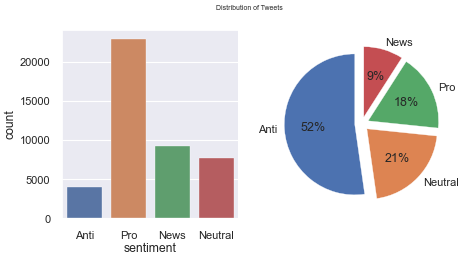

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), dpi=50)

sns.countplot(eda["sentiment"], ax=axes[0])
labels = list(sentiment_num2name.values())

axes[1].pie(eda["sentiment"].value_counts(),
            labels=labels,
            autopct="%1.0f%%",
            startangle=90,
            explode=tuple([0.1] * len(labels)))

fig.suptitle("Distribution of Tweets", fontsize=10)
plt.show()

### Observations:

- The most popular hashtags are, broadly, **climate** and **climatechange**. Which is expected, given the topic; but also, among the top 3 are relating to **trump** and his campaign slogan **maga**.
- The **BeforeTheFlood** hashtag refers to a 2016 documentary where Leonardo DiCaprio met with scientists, activists, and word leaders to discuss the dangers of climate and and possible solutions.
- **COP22**, **ParisAgreement**, and **Trump** in the **Pro** `sentiment` are likely related to the formal process Trump's administrastion began to exit the Paris Agreements, where north of 200 nations pledged to reduce greenhour gas emissions, assist developing nations, and assist [poor] nations struggling with the consequences of a warming Earth.
- Interestingly, **auspol** (short for Australian Politics) made the shortlist of the **Pro** `sentiment`. This is likeyl attributed to an assessment published quantifying the role of climate change in Australian brushfires and their increaseed risk of occuring.

In [ ]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords, wordnet  

In [ ]:
plt.figure(figsize=(15, 15))
sns.boxplot(x="sentiment", y="length", data=eda, palette=("Blues_d"))
plt.title("Tweet Length Distribution for each Sentiment")
plt.show()

In [13]:
from collections import Counter

# Modeling

- Random Forests
- Naïve Bayes
- K-Nearest Neighbors
- Logistic Regression
- Support Vector Machines (Linear SVC)

In [14]:
# Preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Building classification models
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Model evaluation
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

## Your professors don't give you test answers, there's a reason

As with every Supervised Learning task, we need to split our data into (at least) Training and Validation sets. Typically, data will be given to you as a `Training` and `Testing` sets; but in our case, we have one massive CSV, so we need to make that split ourselves.

These splits allow us to train our model, but also give us the ability to test it's performance on data it _shouldn't have seen_. (This is a problem known as "data leakage" – try to avoid it.)

In [15]:
X_all = tweets["message"]
y_all = tweets["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.25, random_state=1337)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=1337)

**What is TFIDF?** Essentially, it assigns word frequency scores. These scores _try_ to highlight words of greater interest – you can get at this idea by looking at in-document frequency vs across-document frequency. The `TFIDFVectorizer` will tokenize the documents, learn the vocabulary and "inverse document frequency wegihtings", and allow you to encode new documents.

In [16]:
tfidf = TfidfVectorizer()
tfidf.fit_transform(X_train)

<24717x48846 sparse matrix of type '<class 'numpy.float64'>'
	with 431184 stored elements in Compressed Sparse Row format>

The following functions `train`, `grade`, and `train_and_grade` are helper functiosn to make life easier and practice DRY.

In [17]:
def train(tfidf, model, train_data, train_labels, test_data):
    model.fit(tfidf.transform(train_data), train_labels)
    preds = model.predict(tfidf.transform(test_data))
    
    return preds

In [18]:
def grade(model, preds, test_labels):
    print(metrics.classification_report(test_labels, preds))
    
    cm = confusion_matrix(test_labels, preds)
    cm_normd = cm / cm.sum(axis=1).reshape(-1, 1)
    
    heatmap_kwargs = dict(
        cmap="YlGnBu",
        xticklabels=model.classes_,
        yticklabels=model.classes_,
        vmin=0.,
        vmax=1.,
        annot=True,
        annot_kws={"size": 10},
    )
    
    sns.heatmap(cm_normd, **heatmap_kwargs)
    
    plt.title(f"{model.__class__.__name__} Classification")
    plt.ylabel("Ground-truth labels")
    plt.xlabel("Predicted labels")
    plt.plot()

In [22]:
def function(tfidf, model, train_data, train_labels, test_data, test_labels):
    preds = train(tfidf, model, train_data, train_labels, test_data)
    grade(model, preds, test_labels)

## Random Forests


C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       787
           0       0.00      0.00      0.00      1420
           1       0.52      1.00      0.69      4301
           2       0.00      0.00      0.00      1732

    accuracy                           0.52      8240
   macro avg       0.13      0.25      0.17      8240
weighted avg       0.27      0.52      0.36      8240



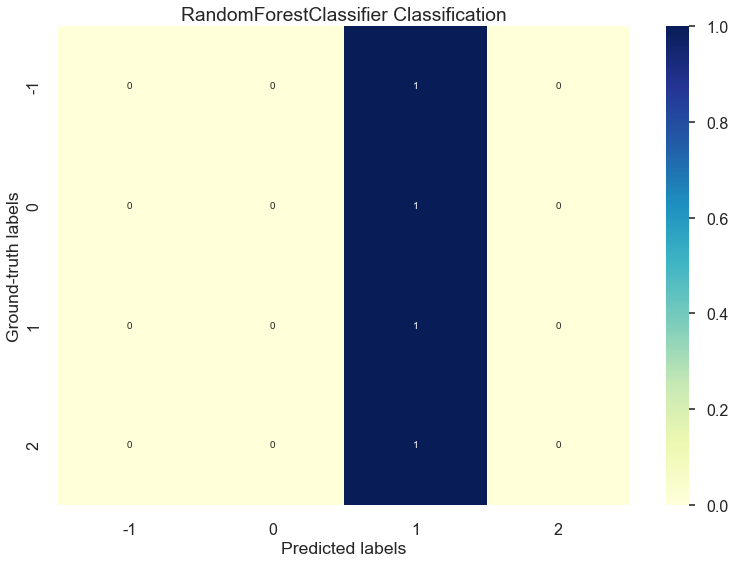

In [35]:
rf = RandomForestClassifier(max_depth=5, n_estimators=100)
function(tfidf, rf, X_train, y_train, X_valid, y_valid)

### Observations:

- From the Confusion Matrix above, you can see that the model strictly predicts the **Pro** `sentiment`. This is likely due to the balance of data, but since we haven't tested that, we can't quite conclude that.
- Looking at the Precision/Recall/F1 Score, for the **Anti**, **Neutral**, and **News** `sentiment`s, you'll see they're all 0.
- Tree-based methods are prone to overfitting on imbalanced data, like what we have. However, we could potentially re-sample so the training data has a more uniform spread of each `sentiment` to test if that's truly the problem with our `RandomForestClassifier`.
- Our overall F1 score is 0.52, which if you recall from our earlier visualizations, matches the %-age of **Pro** `sentiment` Tweets.

## Naïve Bayes

$$P(A | B) = \frac{P(B|A) \cdot P(A)}{P(B)}$$

              precision    recall  f1-score   support

          -1       1.00      0.01      0.02       787
           0       0.97      0.04      0.08      1420
           1       0.55      1.00      0.71      4301
           2       0.95      0.21      0.35      1732

    accuracy                           0.57      8240
   macro avg       0.87      0.31      0.29      8240
weighted avg       0.75      0.57      0.46      8240



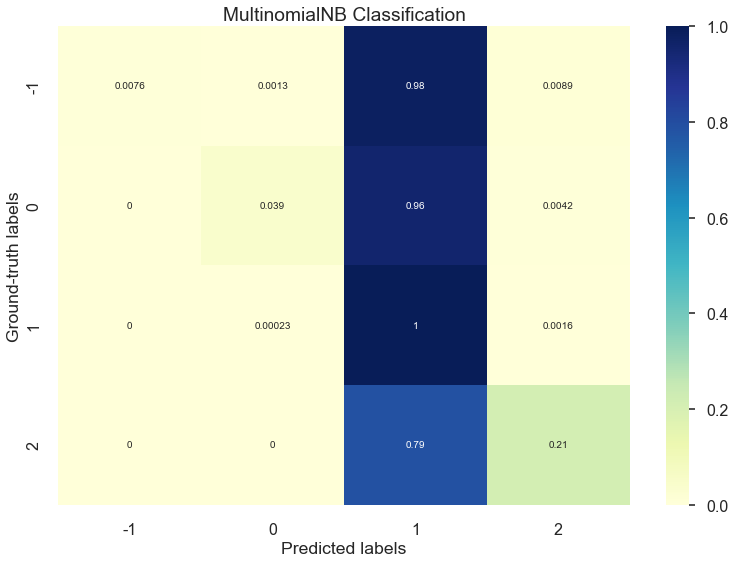

In [24]:
nb = MultinomialNB()
function(tfidf, nb, X_train, y_train, X_valid, y_valid)

### Observations:

- An improvement of Random Forests, but it still performs pretty poorly.
- It still classifies most Tweets with the **Pro** `sentiment`.
- Precision, Accuracy, and F1 Scores, though, have signifcantly improved across the other `sentiments`.
- While Naïve Bayes performs better, it's performance is likely hampered by the balance of data we have.

## K-Nearest Neighbors


              precision    recall  f1-score   support

          -1       0.53      0.39      0.45       787
           0       0.43      0.41      0.42      1420
           1       0.71      0.78      0.74      4301
           2       0.67      0.61      0.64      1732

    accuracy                           0.64      8240
   macro avg       0.58      0.55      0.56      8240
weighted avg       0.63      0.64      0.64      8240



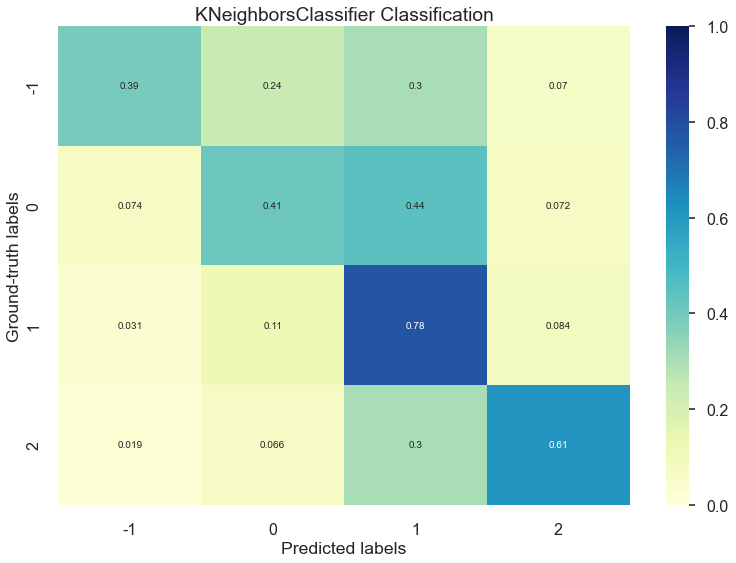

In [25]:
knn = KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)
function(tfidf, knn, X_train, y_train, X_valid, y_valid)

### Observations:

- KNN improves over both Naïve Bayes and Random Forests.
- It still leans **Pro** on classification, but you'll notice that it actually has greater diversity in classification, overall.

## [Multinomial] Logistic Regression (Classification)



              precision    recall  f1-score   support

          -1       0.53      0.65      0.58       787
           0       0.54      0.51      0.52      1420
           1       0.84      0.71      0.77      4301
           2       0.65      0.87      0.74      1732

    accuracy                           0.70      8240
   macro avg       0.64      0.68      0.65      8240
weighted avg       0.72      0.70      0.70      8240



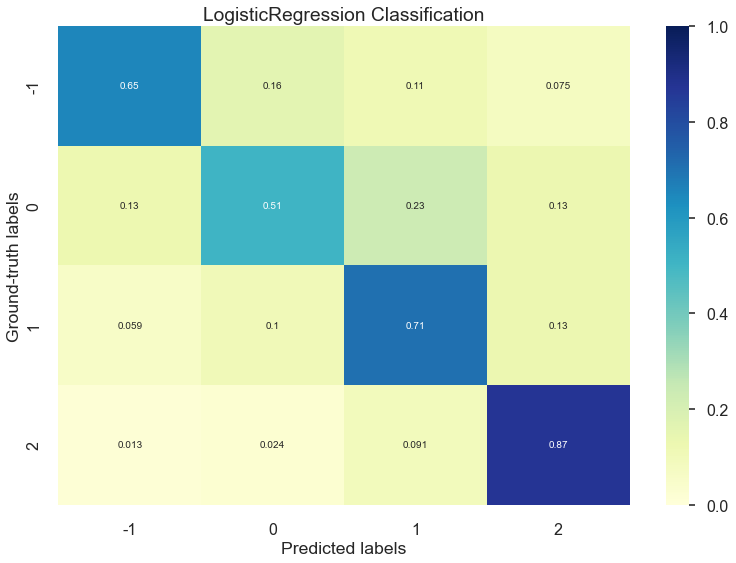

In [26]:
logreg = LogisticRegression(C=1, class_weight="balanced", max_iter=1000)
function(tfidf, logreg, X_train, y_train, X_valid, y_valid)

### Observations:

- Logistic Regression does quite well, especially compared to the previous models.
- The Precision, Recall, and F1-scores of all non-**Pro** classes is still trending upwards, which is good.

## Support Vector Machines (Linear SVC)


              precision    recall  f1-score   support

          -1       0.63      0.60      0.61       787
           0       0.59      0.45      0.51      1420
           1       0.80      0.82      0.81      4301
           2       0.72      0.83      0.77      1732

    accuracy                           0.73      8240
   macro avg       0.68      0.67      0.67      8240
weighted avg       0.73      0.73      0.73      8240



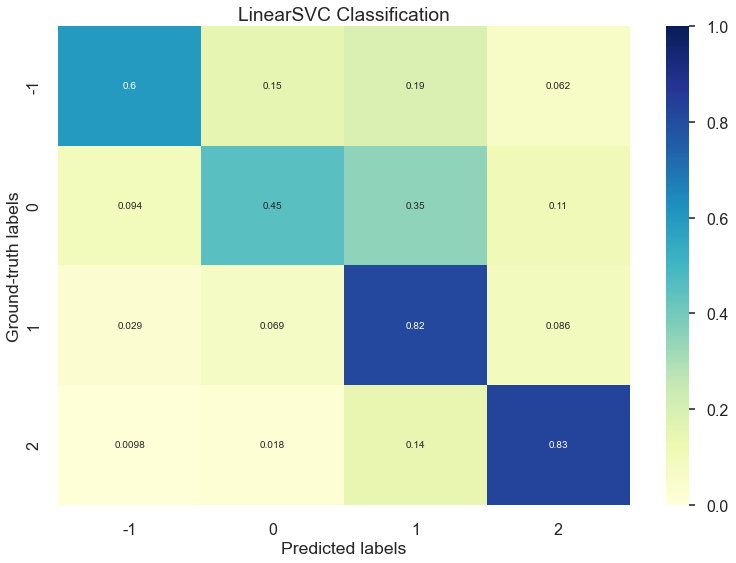

In [27]:
svm_lsvc = LinearSVC(class_weight="balanced")
function(tfidf, svm_lsvc, X_train, y_train, X_valid, y_valid)

### Observations:

- SVM is able to quite successfully classify Tweets.
- Based on the CM above, you can see there are pretty clear boundaries across all the `sentiments`.
- Interestly, the SVM seems more confused about what should be classified as **Pro** than even Logistic Regression.
- The trade-off of classifying **Pro** tweets, though, still leads to gains in properly classifying the majority of our data correctly.